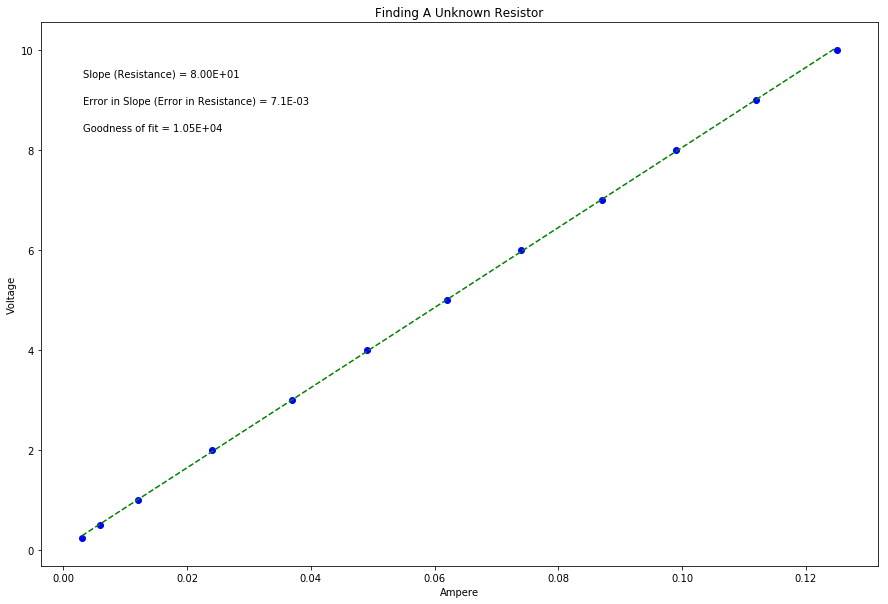

In [8]:
#Physics 216
#Plotting code to use the whole year!
#Jaylene Naylor
#September 2015, modified Sept 2017, August 2018
#-------------------------------------------#
%matplotlib inline
#Import packages and libraries needed and give them shortcut names
from __future__ import division
import numpy as np
import matplotlib.pyplot as plt

#-------------------------------------------#
#Data Section - Create Arrays for data. Perform necessary calculations
#CHANGE THE VARIABLE NAMES and numbers to match your data
Amp = np.array([0.003,0.006,0.012,0.024,0.037,0.049,0.062,0.074,0.087,0.099,0.112,0.125]) #what are units?
Volts = np.array([0.238,0.498,1.005,2.003,3.006,4.005,5.007,6.001,7,8,9,10]) #what are units?


#--------------------------------------------#
#Create arrays for uncertainties
#CHANGE THE VARIABLE NAME and numbers to match your data 
err_Volts = np.array([0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001])


#--------------------------------------------#
#Re-assign variables as x, y, dy so that the following code may remain generic

x = Amp  #this should be the array you want to plot on the x axis
y = Volts
dy = err_Volts #this should be your error in y array

#----------------------------------------------#
#Don't need to change anything in this section!
 
#Find the intercept and slope, b and m, from Python's polynomial fitting function
b,m=np.polynomial.polynomial.polyfit(x,y,1,w=dy)

#Write the equation for the best fit line based on the slope and intercept
fit = b+m*x

#Calculate the error in slope and intercept 
#def Delta(x, dy) is a function, and we will learn how to write our own at a later date. They are very useful!
def Delta(x, dy):
    D = (sum(1/dy**2))*(sum(x**2/dy**2))-(sum(x/dy**2))**2
    return D
 
D=Delta(x, dy)
 
dm = np.sqrt(1/D*sum(1/dy**2)) #error in slope
db = np.sqrt(1/D*sum(x**2/dy**2)) #error in intercept

#Calculate the "goodness of fit" from the linear least squares fitting document
def LLSFD2(x,y,dy):
    N = sum(((y-b-m*x)/dy)**2)
    return N
                      
N = LLSFD2(x,y,dy)

#-----------------------------------------------------------------------#
#Plot data on graph. Plot error bars and place values for slope, error in slope and goodness of fit on the plot using "annotate"
plt.figure(figsize=(15,10))
 
plt.plot(x, fit, color='green', linestyle='--')
plt.scatter(x, y, color='blue', marker='o')
 
 
#create labels  YOU NEED TO CHANGE THESE!!!
plt.xlabel('Ampere')
plt.ylabel('Voltage')
plt.title('Finding A Unknown Resistor')
 
plt.errorbar(x, y, yerr=dy, xerr=None, fmt="none") #don't need to plot x error bars
 
plt.annotate('Slope (Resistance) = {value:.{digits}E}'.format(value=m, digits=2),
             (0.05, 0.9), xycoords='axes fraction')
 
plt.annotate('Error in Slope (Error in Resistance) = {value:.{digits}E}'.format(value=dm, digits=1),
             (0.05, 0.85), xycoords='axes fraction')
 
plt.annotate('Goodness of fit = {value:.{digits}E}'.format(value=N, digits=2),
             (0.05, 0.80), xycoords='axes fraction')

plt.show()


Accepted Resistance = 81.6 ± 0.05 Ω
Experimental Resistance = 80 ± 0.0071 Ω

In [66]:
#series #based on recorded numbers.
def Resistance_S (V1,A1): 
    Res_S1 = (V1/A1)
    return Res_S1

def Resistance_S2 (V2,A2):
    Res_S2 = (V2/A2)
    return Res_S2

V1 = 0.955 
A1 = 0.041
V2 = 4.033
A2 = 0.041

R1 = Resistance_S (V1,A1)
R2 = Resistance_S2 (V2,A2)
                    
print ("R1E = ",R1,"Ω", "R2E = ",R2,"Ω", "R_TE = ",R2+R1,"Ω")
#series

R1E =  23.292682926829265 Ω R2E =  98.3658536585366 Ω R_TE =  121.65853658536585 Ω


In [67]:
#series
#based on Actaully recorded values.
def Rule_3S (deltaa,deltab):
    delta3 = (((deltaa)**2)+((deltab)**2))**(1/2)
    return delta3

deltaa = 0.05
deltab = 0.05
R_T = 99.7+ 23.6

Rule3 = Rule_3S (deltaa,deltab)
print ("R_totalAct =",R_T,"R_TAct","Uncertainty_R_total = ",Rule3,"δR_TAct")

#series

R_totalAct = 123.30000000000001 R_TAct Uncertainty_R_total =  0.07071067811865477 δR_TAct


In [68]:
#series, this part is all experimental data
def Rule_4Rs (Q,M,deltaA,A,N,deltaB,B):
    delta4Rs = Q*((((M*deltaA/A)**2)+((N*deltaB/B)**2))**(1/2))
    return delta4Rs

Q1 = 121.65853658536585
M1 = 1
deltaA1 = 0.001
A1 = 0.955 
N1 = 1
deltaB1 =0.001
B1 = 0.041

Q2 = 121.65853658536585
M2 = 1
deltaA2 = 0.001
A2 = 4.033
N2 = 1
deltaB2 =0.001
B2 = 0.041

Rule4_1 = Rule_4Rs (Q1,M1,deltaA1,A1,N1,deltaB1,B1)
Rule4_2 = Rule_4Rs (Q2,M2,deltaA2,A2,N2,deltaB2,B2)
print ("R1E =",Rule4_1,"δR1E","R2E =",Rule4_2,"δR2E") 
# Experimental values

def Rule_3SE (deltaa,deltab):
    delta3 = (((deltaa)**2)+((deltab)**2))**(1/2)
    return delta3

deltaa = Rule4_1
deltab = Rule4_2
Rule3E = Rule_3SE (deltaa,deltab)
print ("R_TotalE = ",Rule3E,"δR_TotalE")


R1E = 2.9700146953942377 δR1E R2E = 2.9674347107129875 δR2E
R_TotalE =  4.198411134370001 δR_TotalE


In [75]:
#Parellel 
#based on recorded numbers.
def Resistance_P (V1,A1): 
    Res_P1 = (V1/A1)
    return Res_P1

V1 = 5.007 
A1 = 0.215
V2 = 5.007 
A2 = 0.05

R1 = Resistance_P (V1,A1)
R2 = Resistance_P (V2,A2)
R_TExp = 1/((1/R2)+(1/R1))
print ("R1E = ",R1,"Ω", "R2E = ",R2,"Ω")
print ("R_TExp = ",R_TExp,"Ω")
#Parellel 
#based on recorded actual Values.

V_T = 5.007
A_T = 0.26
R_TAct = Resistance_P (V_T,A_T)
print ("R_TAct =",R_TAct,"Ω")

R1E =  23.288372093023256 Ω R2E =  100.13999999999999 Ω
R_TExp =  18.894339622641507 Ω
R_TAct = 19.257692307692306 Ω


In [74]:
#series, this part is all experimental data
def Rule_4Rp (Q,M,deltaA,A,N,deltaB,B):
    delta4Rp = Q*((((M*deltaA/A)**2)+((N*deltaB/B)**2))**(1/2))
    return delta4Rp

Q1 = 18.894339622641507
M1 = 1
deltaA1 = 0.001
A1 = 5.007 
N1 = 1
deltaB1 =0.001
B1 = 0.215

Q2 = 18.894339622641507
M2 = 1
deltaA2 = 0.001
A2 = 5.007
N2 = 1
deltaB2 =0.001
B2 = 0.05

Rule4_1 = Rule_4Rp (Q1,M1,deltaA1,A1,N1,deltaB1,B1)
Rule4_2 = Rule_4Rp (Q2,M2,deltaA2,A2,N2,deltaB2,B2)
print ("R1E =",Rule4_1,"δR1E","R2E =",Rule4_2,"δR2E") 
# Experimental values

def Rule_3PE (deltaa,deltab):
    delta3 = (((deltaa)**2)+((deltab)**2))**(1/2)
    return delta3

deltaa = Rule4_1
deltab = Rule4_2
Rule3E = Rule_3PE (deltaa,deltab)
print ("R_TotalE = ",Rule3E,"δR_TotalExp")

Q3 = 19.257692307692306
M3 = 1
deltaA3 = 0.001
A3 = 5.007
N3 = 1
deltaB3 =0.001
B3 = 0.26
Rule4_3 = Rule_4Rp (Q3,M3,deltaA3,A3,N3,deltaB3,B3)
print ("R_TotalAct =",Rule4_3,"δR_TotalAct")

R1E = 0.08796163074515997 δR1E R2E = 0.3779056335294944 δR2E
R_TotalE =  0.3880076240702963 δR_TotalExp
R_TotalAct = 0.0741678403067364 δR_TotalAct
